# Аналитика в авиакомпании F9

**Цель проекта:** - определить предпочтения пользователей, покупающих билеты на те или иные направления в зависимости от локации, где проходят крупнейшие фестивали.

### Оглавление:
1. Написание парсера для сбора с сайта данных о 10 крупнейших фестивалях 2018 года
2. Исследовательский анализ данных
3. Проверка гипотезы, что количество рейсов во время фестивалей увеличивается
4. **Аналитика средствами Python**
   1. Импорт данных
   2. Изучение данных и проверка типов данных на корректность
   3. Выбор топ-10 городов по количеству рейсов
   4. Построение графиков
   5. Вывод

### У нас есть файлы, в которых содержатся результаты запросов

**/datasets/query_1.csv** — результат первого запроса. В нём содержится информация о:
* model — модели самолета
* flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

**/datasets/query_3.csv** — результат третьего запроса. В нём содержится информация о:
* city — городах
* average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года

### Импорт данных

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

* Импортируем библиотеки
* Далее импортируем данные из файлов, сразу проверяем на тип данных и пропуски

In [2]:
airstat_model = pd.read_csv('query_1.csv')
airstat_city = pd.read_csv('query_3.csv')

### Изучение данных

In [3]:
display(airstat_model)
print(airstat_model.info())
print(airstat_model.isna().sum())
print(airstat_model.duplicated().sum())
print('---------------------------------------------------------------------')
display(airstat_city)
print(airstat_city.info())
print(airstat_city.isna().sum())
print(airstat_city.isna().sum())

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
model             0
flights_amount    0
dtype: int64
0
---------------------------------------------------------------------


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None
city               0
average_flights    0
dtype: int64
city               0
average_flights    0
dtype: int64


Не обнаружилось пропусков в данных. Типы данных корректные
**Upd** - Дубликатов также не обнаружено 

### Выбор топ-10 городов по количеству рейсов

In [4]:
airstat_city_top = airstat_city.sort_values(by='average_flights', ascending=False).head(10)
print('Топ-10 городов по количеству рейсов')
display(airstat_city_top)

Топ-10 городов по количеству рейсов


,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


* По результатам данной таблицы мы видим, что самое большое число рейсов имеет столица. В Москве больще всего аэропортов, по сравнению с другими городами России, тем более, что эти аэропорты 4/4 международные.
* Остальные места в топ-10 распределились между важными территориальными точками страны, а именно: север- Санкт-Петербург, Урал-Екатеринбург и Пермь, центральная точка страны - Красноярск и Новосибирск, юг- Ростов-на-Дону и Сочи, запад - Брянск. Ульяновск, скорее всего, попал в данную выборку не из-за территориальных значений.

### Построение графиков

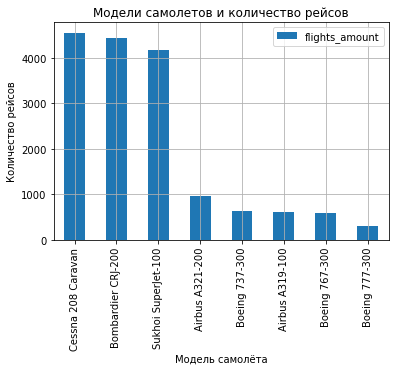

In [5]:
airstat_model.sort_values(by='flights_amount', ascending=False).plot(x='model', y='flights_amount', kind='bar', grid=True)
plt.title('Модели самолетов и количество рейсов')
plt.xlabel('Модель самолёта')
plt.ylabel('Количество рейсов')
plt.show()

На графике видно, что наибольшее количество рейсов совершаются снутри страны ближнемагистральными моделями самолетов.
* Cessna 208 - самый маленький представитель самолетов в списке.
* Bombardier CRJ200 - чуть побольше, крайне старый аппарат.
* Оба этих самолета импортные и крайне старые, большой их парк был выкуплен нашими региональными лоукостерами как альтернатива дорогим машинам. Это может объяснить то, что они совершают такое огромное количество рейсов. 
* Sukhoi Superjet 100 - среднеразмерный российский самолет, который совершает и международные рейсы. Самое большое их количество принадлежит Аэрофлоту, что объясняет большое число рейсов, ведь Аэрофлот - крупнейшая российская авиакомпания.

**Upd** 
Низкое количество рейсов на Boeing 777-300 и Boeing 767-300 объясняется тем, что это дальнемагистральные, широкофлюзеляжные самолёты. Проще говоря - те самолёты, которые могут отвезти большое количество людей на очень дальнее расстрояние. Поэтому их просто нерентабельно отправлять в Сочи или Читу например. Думаю те рейсы, которые приходятся на эти самолёты - это полёты в Южно-Сахалинск/Якутск и подобные места. 

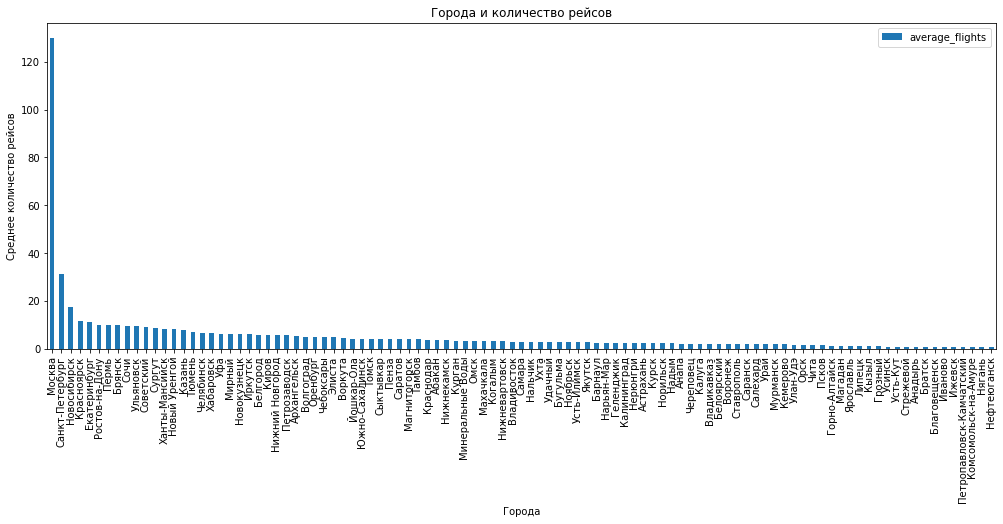

In [6]:
airstat_city.sort_values(by='average_flights', ascending=False).plot(x='city', y='average_flights', kind='bar', figsize=(17, 6))
plt.title('Города и количество рейсов')
plt.xlabel('Города')
plt.ylabel('Среднее количество рейсов')
plt.show()

Вывод по данному графику полностью аналогичен выводу про топ-10 городов с количеством рейсов, кроме городов с наименьшим числом рейсов. Про них можно добавить то, что , находясь в этом списке, они являются либо крайне маленькими городами(летать становится дорого и бессмысленно, когда проще и дешевле доехать на наземном транспорте), либо очень отдаленными от столицы, например, Петропавловск-Камчатск или Комсомольск-на-Амуре

**Upd** - Москва, Cанкт-Питербург являются городами-лидерами потому что в них традиционно проводится бОльшее количество фестивалей. Мало какие исполнители, кроме российских групп, ездят по России с турами. Новосибирск - также является своеобразной "столицей", только Сибири, а также третий по численности населения город РФ, поэтому его присутствие в топ-3 тоже объяснимо. 

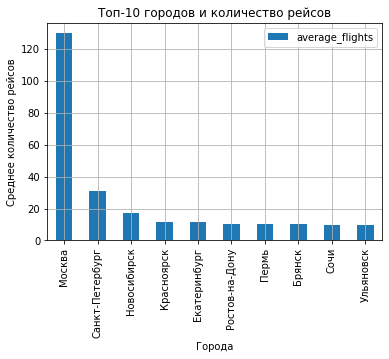

In [7]:
airstat_city_top.sort_values(by='average_flights', ascending=False).plot(x='city', y='average_flights', kind='bar', grid=True)
plt.title('Топ-10 городов и количество рейсов')
plt.xlabel('Города')
plt.ylabel('Среднее количество рейсов')
plt.show()

Данный вывод полностью аналогичен выводу по таблице топ-10 городов:
* По результатам данной таблицы мы видим, что самое большое число рейсов имеет столица. В Москве больще всего аэропортов, по сравнению с другими городами России, тем более, что эти аэропорты 4/4 международные.
* Остальные места в топ-10 распределились между важными территориальными точками страны, а именно: север- Санкт-Петербург, Урал-Екатеринбург и Пермь, центральная точка страны - Красноярск и Новосибирск, юг- Ростов-на-Дону и Сочи, запад - Брянск. Ульяновск, скорее всего, попал в данную выборку не из-за территориальных значений.

### Вывод

* Графики и числа, которые мы выгрузили и обработали, говорят нам о том, что большинство рейсов совершается в крупных городах. Это значит, что необходимо сконцентрировать свои усилия на усиление влияния именно на этот рынок, т.к. в маленьких городах частое использование аэропорта для людей невостребовано.
* Также мы четко видим, что бОльшее число рейсов совершаются старыми самолетами для региональных рейсов. На это также стоит обратить внимание и приложить усилия для улучшения ситуации.
* Итого мы имеем то, что нужно обратить внимание на обновление парка самолетов в крупных городах, где они используются.